In [1]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import string
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv('../data/final_df.csv')
df.head()

,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"thank you very much, chris. and thanks to unl...","['thank', 'much', 'chris', 'thanks', 'unlv', '...",thank much chris thanks unlv hosting know thin...,NaN
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"well, thank you. are you a teacher? yes, i th...","['well', 'thank', 'teacher', 'yes', 'think', '...",well thank teacher yes think good question hea...,NaN
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"how are you, donald? [applause] well, thank ...","['donald', 'applause', 'well', 'thank', 'leste...",donald applause well thank lester thanks hofst...,NaN
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"i was going to applaud, too. well, thank you,...","['going', 'applaud', 'well', 'thank', 'jim', '...",going applaud well thank jim thanks people san...,NaN
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"thank you, jim. and thank you to the people o...","['thank', 'jim', 'thank', 'people', 'hartford'...",thank jim thank people hartford host want begi...,NaN


In [3]:
df.shape

(118, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           118 non-null    int64 
 1   Name           118 non-null    object
 2   Text           116 non-null    object
 3   Target         118 non-null    int64 
 4   text_lower     84 non-null     object
 5   list_tokens    116 non-null    object
 6   string_tokens  103 non-null    object
 7   link           47 non-null     object
dtypes: int64(2), object(6)
memory usage: 7.5+ KB


In [5]:
df[df['list_tokens'].isna()]

,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link
18,2008,OBAMA,NaN,0,NaN,NaN,well thank much jim thanks commission universi...,NaN
24,2008,MCCAIN,NaN,1,NaN,NaN,well thank jim thanks everybody sad note tonig...,NaN


In [6]:
row1 = df.iloc[18]
row2 = df.iloc[24]

df['list_tokens'][18] = row1['string_tokens'].split()
df['list_tokens'][24] = row2['string_tokens'].split()
df[df['list_tokens'].isna()]

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_40436/964711886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_tokens'][18] = row1['string_tokens'].split()
/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_40436/964711886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_tokens'][24] = row2['string_tokens'].split()


,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link


In [7]:
df.iloc[24]

Year                                                          2008
Name                                                        MCCAIN
Text                                                           NaN
Target                                                           1
text_lower                                                     NaN
list_tokens      [well, thank, jim, thanks, everybody, sad, not...
string_tokens    well thank jim thanks everybody sad note tonig...
link                                                           NaN
Name: 24, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           118 non-null    int64 
 1   Name           118 non-null    object
 2   Text           116 non-null    object
 3   Target         118 non-null    int64 
 4   text_lower     84 non-null     object
 5   list_tokens    118 non-null    object
 6   string_tokens  103 non-null    object
 7   link           47 non-null     object
dtypes: int64(2), object(6)
memory usage: 7.5+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           118 non-null    int64 
 1   Name           118 non-null    object
 2   Text           116 non-null    object
 3   Target         118 non-null    int64 
 4   text_lower     84 non-null     object
 5   list_tokens    118 non-null    object
 6   string_tokens  103 non-null    object
 7   link           47 non-null     object
dtypes: int64(2), object(6)
memory usage: 7.5+ KB


In [13]:
import ast

# Function to convert string to list
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return string  # returns the original string in case of an error

# Apply this function to the desired column
df['list_tokens'] = df['list_tokens'].apply(convert_string_to_list)

In [14]:
df['list_tokens'][1]

['well',
 'thank',
 'teacher',
 'yes',
 'think',
 'good',
 'question',
 'heard',
 'lot',
 'teacher',
 'parent',
 'concern',
 'thing',
 'said',
 'done',
 'campaign',
 'think',
 'important',
 'make',
 'clear',
 'child',
 'country',
 'really',
 'great',
 'good',
 'going',
 'respect',
 'one',
 'another',
 'lift',
 'going',
 'looking',
 'way',
 'celebrate',
 'diversity',
 'going',
 'try',
 'reach',
 'every',
 'boy',
 'girl',
 'well',
 'every',
 'adult',
 'bring',
 'working',
 'behalf',
 'country',
 'positive',
 'optimistic',
 'view',
 'together',
 'slogan',
 'campaign',
 'stronger',
 'together',
 'think',
 'work',
 'together',
 'overcome',
 'divisiveness',
 'sometimes',
 'set',
 'american',
 'one',
 'another',
 'instead',
 'make',
 'big',
 'goal',
 'set',
 'forth',
 'big',
 'goal',
 'getting',
 'economy',
 'work',
 'everyone',
 'top',
 'making',
 'sure',
 'best',
 'education',
 'system',
 'preschool',
 'college',
 'making',
 'affordable',
 'much',
 'else',
 'set',
 'goal',
 'together',
 'tr

In [15]:
df['string_tokens']= [" ".join(x) for x in df['list_tokens']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           118 non-null    int64 
 1   Name           118 non-null    object
 2   Text           116 non-null    object
 3   Target         118 non-null    int64 
 4   text_lower     84 non-null     object
 5   list_tokens    118 non-null    object
 6   string_tokens  118 non-null    object
 7   link           47 non-null     object
dtypes: int64(2), object(6)
memory usage: 7.5+ KB


In [17]:
df['string_tokens'][1]

'well thank teacher yes think good question heard lot teacher parent concern thing said done campaign think important make clear child country really great good going respect one another lift going looking way celebrate diversity going try reach every boy girl well every adult bring working behalf country positive optimistic view together slogan campaign stronger together think work together overcome divisiveness sometimes set american one another instead make big goal set forth big goal getting economy work everyone top making sure best education system preschool college making affordable much else set goal together try achieve nothing opinion america hope come together campaign obviously hoping earn vote hoping elected november promise work every american want president american regardless political belief come look like religion want heal country bring together think best way get future child grandchild deserve well like everyone else spent lot time thinking last hour heard saw know

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df["string_tokens"], df['Target'], random_state=42)

In [19]:
pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()), 
    ('mnb', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [20]:
cross_val_score(pipe, X_train, y_train)

array([0.5       , 0.66666667, 0.72222222, 0.58823529, 0.52941176])

In [21]:
pipe.score(X_test, y_test)

0.5

In [22]:
def evaluate_grid(gs):
    y_pred = gs.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    print("Best Params: " + str(gs.best_params_)) 
    print("Best CV Accuracy: " + str(gs.best_score_)) 
    print("Test Accuracy: " + str(accuracy_test))

In [29]:
def plot_cm(y_test, gs):
    '''
    Takes in true values and predicted values and plots a confusion matrix
    '''
    y_pred = gs.predict(X_test)    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dem', 'rep'])
    disp.plot();

In [30]:
gs = GridSearchCV(pipe, param_grid= {
    'tfidf__max_df': [0.75, 0.9, 1.0], # default 1.0
    'tfidf__min_df': [0.0, 0.05, 0.1], # default 1
    'tfidf__ngram_range': [(1, 1), (1, 2)], # default (1,1)
    'tfidf__max_features': [None, 2, 20], # default (None)
    'tfidf__norm': ['l1', 'l2', None]
})

In [31]:
gs.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'tfidf__max_df': [0.75, 0.9, 1.0],
                         'tfidf__max_features': [None, 2, 20],
                         'tfidf__min_df': [0.0, 0.05, 0.1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__norm': ['l1', 'l2', None]})

In [32]:
evaluate_grid(gs)

Best Params: {'tfidf__max_df': 0.75, 'tfidf__max_features': None, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': None}
Best CV Accuracy: 0.8503267973856209
Test Accuracy: 0.8333333333333334


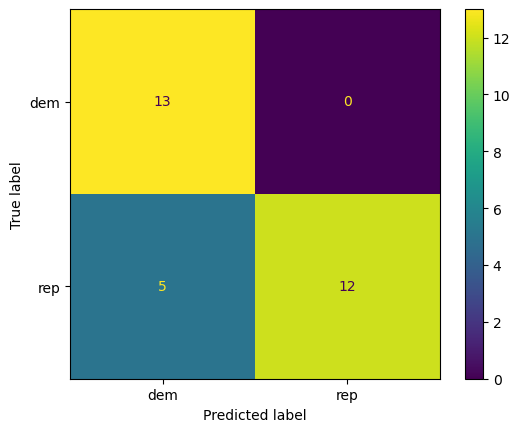

In [33]:
plot_cm(y_test, gs)

In [34]:
gs2 = GridSearchCV(pipe, param_grid= {
    'tfidf__max_df': [0.65, 0.75, 0.85], # earlier 0.75 was best
    'tfidf__min_df': [0.0], # 0.0 was best
    'tfidf__ngram_range': [(1, 2), (2,2), (1,3)], # default (1,1)
   'tfidf__max_features': [None, 1], # default (None) was best so commenting it out
    'tfidf__norm': [None] # None was best
})
gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'tfidf__max_df': [0.65, 0.75, 0.85],
                         'tfidf__max_features': [None, 1],
                         'tfidf__min_df': [0.0],
                         'tfidf__ngram_range': [(1, 2), (2, 2), (1, 3)],
                         'tfidf__norm': [None]})

In [35]:
evaluate_grid(gs2)

Best Params: {'tfidf__max_df': 0.65, 'tfidf__max_features': None, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (1, 3), 'tfidf__norm': None}
Best CV Accuracy: 0.8738562091503269
Test Accuracy: 0.8666666666666667


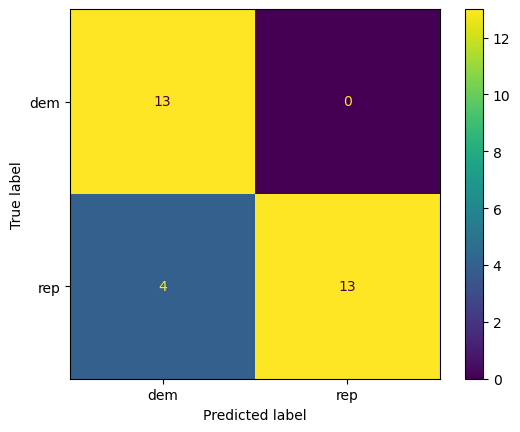

In [36]:
plot_cm(y_test, gs2)

In [37]:
gs3 = GridSearchCV(pipe, param_grid= {
    'tfidf__max_df': [0.55, 0.65, 0.70], # earlier 0.5 was best
    'tfidf__min_df': [0.0], # 0.0 was best
    'tfidf__ngram_range': [(1,3), (2,3)], # default (1,1)
   #'tfidf__max_features': [None, 2, 20], # default (None) was best so commenting it out
    'tfidf__norm': [None] # None was best
})
gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'tfidf__max_df': [0.55, 0.65, 0.7],
                         'tfidf__min_df': [0.0],
                         'tfidf__ngram_range': [(1, 3), (2, 3)],
                         'tfidf__norm': [None]})

In [38]:
evaluate_grid(gs3)

Best Params: {'tfidf__max_df': 0.55, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (2, 3), 'tfidf__norm': None}
Best CV Accuracy: 0.884967320261438
Test Accuracy: 0.9333333333333333


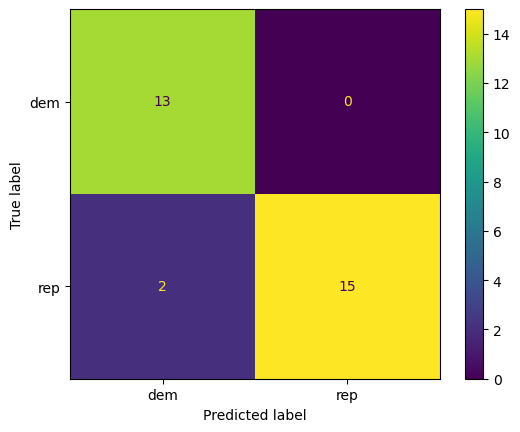

In [39]:
plot_cm(y_test, gs3)

In [ ]:
gs3 = GridSearchCV(pipe, param_grid= {
    'mnb__alpha': [0.55, 0.65, 0.70],
})
gs3.fit(X_train, y_train)